<a href="https://colab.research.google.com/github/tiarayosianti/Decision-Tree-Random-Forest/blob/main/Decision_Tree_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 26.3 MB/s 


# Data Importing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

import shap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bank = pd.read_csv("/content/drive/MyDrive/bank-additional.csv")

In [ ]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Data Preprocessing and Visualizations

In [ ]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

[Text(0, 0.5, 'Age'), Text(0.5, 1.0, 'Client Age')]

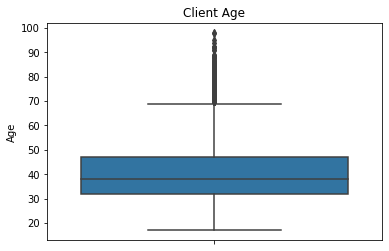

In [ ]:
sns.boxplot(y = 'age', data = bank).set(title = 'Client Age', ylabel = 'Age')

[Text(0, 0.5, 'Duration'), Text(0.5, 1.0, 'Last Contact Duration')]

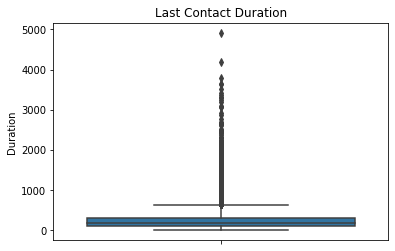

In [ ]:
sns.boxplot(y = 'duration', data = bank).set(title = 'Last Contact Duration', ylabel = 'Duration')

[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Number of Contacts')]

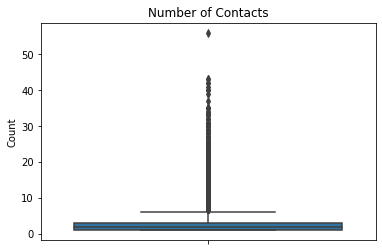

In [ ]:
sns.boxplot(y = 'campaign', data = bank).set(title = 'Number of Contacts', ylabel = 'Count')

[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Number of Days')]

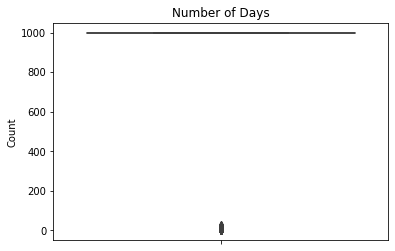

In [ ]:
sns.boxplot(y = 'pdays', data = bank).set(title = 'Number of Days', ylabel = 'Count')

In [ ]:
bank.pdays.quantile([0.25,0.5,0.75])

0.25    999.0
0.50    999.0
0.75    999.0
Name: pdays, dtype: float64

[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Previous Contacts')]

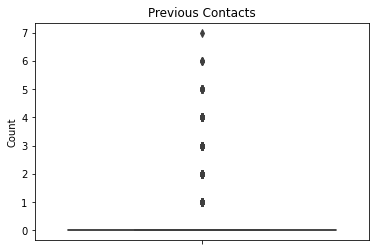

In [ ]:
sns.boxplot(y = 'previous', data = bank).set(title = 'Previous Contacts', ylabel = 'Count')

In [ ]:
bank.previous.quantile([0.25,0.5,0.75])

0.25    0.0
0.50    0.0
0.75    0.0
Name: previous, dtype: float64

[Text(0, 0.5, 'Rate'), Text(0.5, 1.0, 'Employment Variation Rate')]

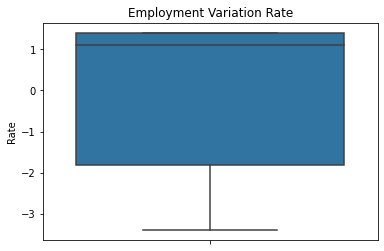

In [ ]:
sns.boxplot(y = 'emp.var.rate', data = bank).set(title = 'Employment Variation Rate', ylabel = 'Rate')

[Text(0, 0.5, 'Index'), Text(0.5, 1.0, 'Consumer Price Index')]

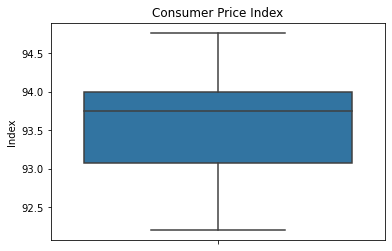

In [ ]:
sns.boxplot(y = 'cons.price.idx', data = bank).set(title = 'Consumer Price Index', ylabel = 'Index')

[Text(0, 0.5, 'Index'), Text(0.5, 1.0, 'Consumer Confidence Index')]

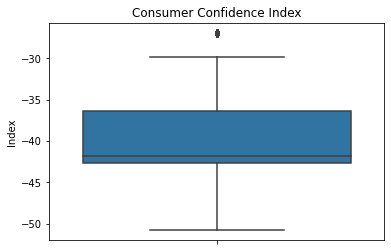

In [ ]:
sns.boxplot(y = 'cons.conf.idx', data = bank).set(title = 'Consumer Confidence Index', ylabel = 'Index')

[Text(0, 0.5, 'Rate'), Text(0.5, 1.0, 'Euribor 3 Month Rate')]

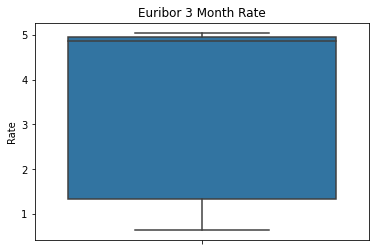

In [ ]:
sns.boxplot(y = 'euribor3m', data = bank).set(title = 'Euribor 3 Month Rate', ylabel = 'Rate')

[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Number of Employees')]

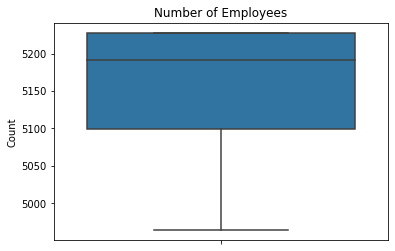

In [ ]:
sns.boxplot(y = 'nr.employed', data = bank).set(title = 'Number of Employees', ylabel = 'Count')

In [ ]:
bank['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

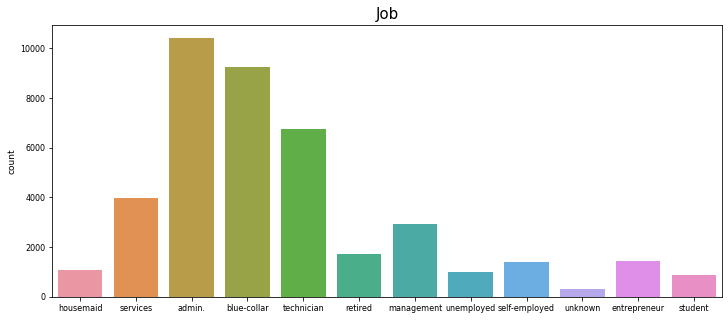

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
sns.countplot(x = 'job', data = bank)
ax.set_xlabel(' ')
ax.set_ylabel('count', fontsize = 9)
ax.set_title('Job', fontsize = 15)
ax.tick_params(labelsize = 8)

In [ ]:
bank['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

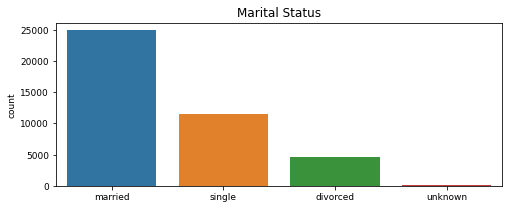

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 3)
sns.countplot(x = 'marital', data = bank)
ax.set_xlabel(' ')
ax.set_ylabel('count', fontsize = 9)
ax.set_title('Marital Status', fontsize = 12)
ax.tick_params(labelsize = 9)

In [ ]:
bank['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

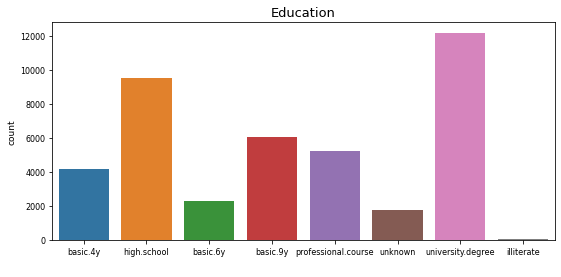

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 4)
sns.countplot(x = 'education', data = bank)
ax.set_xlabel(' ')
ax.set_ylabel('count', fontsize = 9)
ax.set_title('Education', fontsize = 13)
ax.tick_params(labelsize = 8)

In [ ]:
bank['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

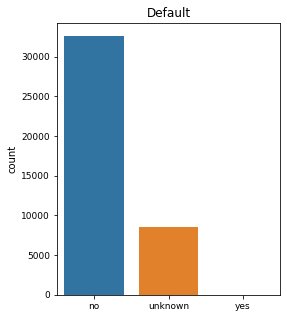

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(4, 5)
sns.countplot(x = 'default', data = bank)
ax.set_xlabel(' ')
ax.set_ylabel('count', fontsize = 10)
ax.set_title('Default', fontsize = 12)
ax.tick_params(labelsize = 9)

In [ ]:
bank['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

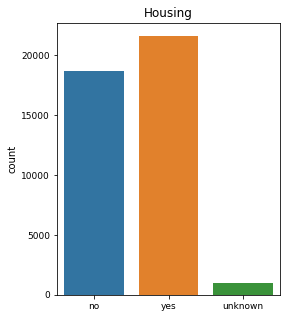

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(4, 5)
sns.countplot(x = 'housing', data = bank)
ax.set_xlabel(' ')
ax.set_ylabel('count', fontsize = 10)
ax.set_title('Housing', fontsize = 12)
ax.tick_params(labelsize = 9)

In [ ]:
bank['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

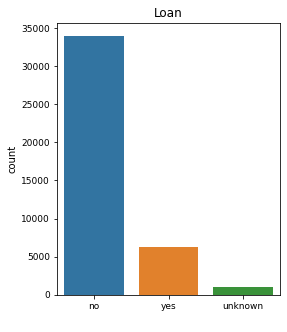

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(4, 5)
sns.countplot(x = 'loan', data = bank)
ax.set_xlabel(' ')
ax.set_ylabel('count', fontsize = 10)
ax.set_title('Loan', fontsize = 12)
ax.tick_params(labelsize = 9)

In [ ]:
bank['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

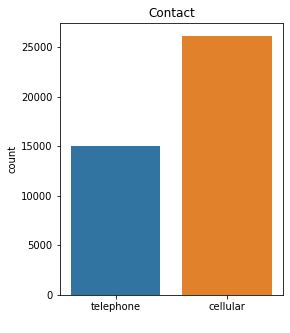

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(4, 5)
sns.countplot(x = 'contact', data = bank)
ax.set_xlabel(' ')
ax.set_ylabel('count', fontsize = 10)
ax.set_title('Contact', fontsize = 12)
ax.tick_params(labelsize = 10)

In [ ]:
bank['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

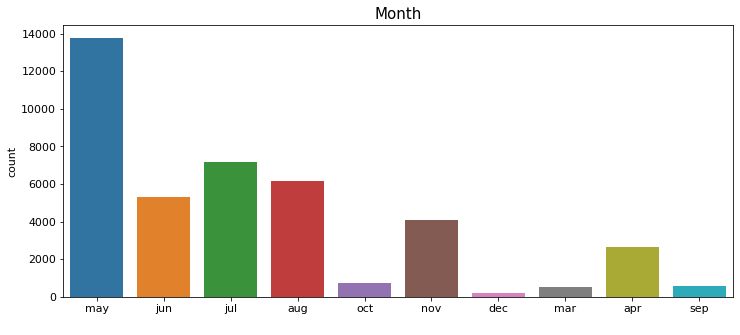

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
sns.countplot(x = 'month', data = bank)
ax.set_xlabel(' ')
ax.set_ylabel('count', fontsize = 11)
ax.set_title('Month', fontsize = 15)
ax.tick_params(labelsize = 11)

In [ ]:
bank['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

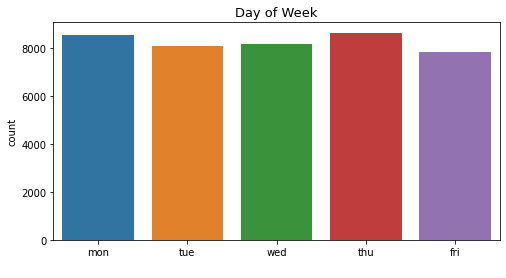

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
sns.countplot(x = 'day_of_week', data = bank)
ax.set_xlabel(' ')
ax.set_ylabel('count', fontsize = 10)
ax.set_title('Day of Week', fontsize = 13)
ax.tick_params(labelsize = 10)

In [ ]:
bank['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

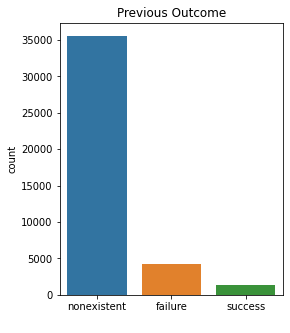

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(4, 5)
sns.countplot(x = 'poutcome', data = bank)
ax.set_xlabel(' ')
ax.set_ylabel('count', fontsize = 10)
ax.set_title('Previous Outcome', fontsize = 12)
ax.tick_params(labelsize = 10)

In [ ]:
bank['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

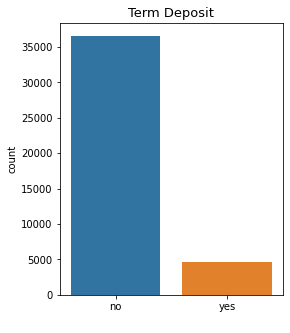

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(4, 5)
sns.countplot(x = 'y', data = bank)
ax.set_xlabel(' ')
ax.set_ylabel('count', fontsize = 10)
ax.set_title('Term Deposit', fontsize = 13)
ax.tick_params(labelsize = 10)

In [ ]:
bank = bank.drop(['day_of_week', 'contact', 'month'], axis = 1)

In [ ]:
bank_dmy = pd.get_dummies(bank)
bank_dmy = bank_dmy.drop(['job_admin.', 'marital_married', 'education_university.degree', 'default_no', 'housing_no', 'loan_no', 'poutcome_nonexistent', 'y_no'], axis = 1)
bank.dmy = bank_dmy.rename(columns = {'y_yes':'y'}, inplace = True) #yes = 1, no = 0
bank_dmy.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,poutcome_failure,poutcome_success,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,0,0,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,0,0,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,0,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
bank_dmy.to_csv('Data Preprocessed.csv', index = False)

In [ ]:
bank_dmy = pd.read_csv('/content/drive/MyDrive/Data Preprocessed.csv')

In [ ]:
X = bank_dmy.drop(['y'], axis = 1)
Y = bank_dmy['y']

In [ ]:
#Untuk Data Klasifikasi
X_trainc, X_testc, Y_trainc, Y_testc = train_test_split(X, Y, test_size = 0.3)

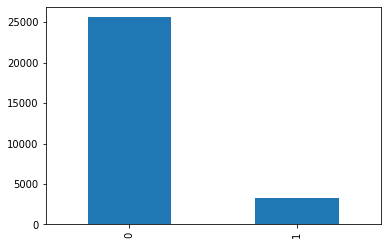

In [ ]:
Y_trainc.value_counts().plot(kind = 'bar')

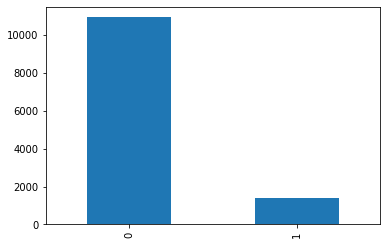

In [ ]:
Y_testc.value_counts().plot(kind = 'bar')

In [ ]:
print(X_trainc.shape)
print(X_testc.shape)
print(Y_trainc.shape)
print(Y_testc.shape)

(28831, 39)
(12357, 39)
(28831,)
(12357,)


In [ ]:
np.random.seed(123)

# Modelling

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf1 = DecisionTreeClassifier(criterion = 'entropy') #Information Gain
clf1.fit(X_trainc, Y_trainc)

DecisionTreeClassifier(criterion='entropy')

[Text(0.36397975709630975, 0.9833333333333333, 'X[9] <= 5087.65\nentropy = 0.51\nsamples = 28831\nvalue = [25561, 3270]'),
 Text(0.12328356571503153, 0.95, 'X[1] <= 158.5\nentropy = 0.993\nsamples = 3449\nvalue = [1892, 1557]'),
 Text(0.020734223171667236, 0.9166666666666666, 'X[1] <= 80.5\nentropy = 0.623\nsamples = 1185\nvalue = [1001, 184]'),
 Text(0.002727582679849983, 0.8833333333333333, 'X[1] <= 62.5\nentropy = 0.183\nsamples = 324\nvalue = [315, 9]'),
 Text(0.002045687009887487, 0.85, 'entropy = 0.0\nsamples = 179\nvalue = [179, 0]'),
 Text(0.0034094783498124785, 0.85, 'X[1] <= 65.5\nentropy = 0.336\nsamples = 145\nvalue = [136, 9]'),
 Text(0.0013637913399249914, 0.8166666666666667, 'X[3] <= 502.5\nentropy = 0.837\nsamples = 15\nvalue = [11, 4]'),
 Text(0.0006818956699624957, 0.7833333333333333, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.002045687009887487, 0.7833333333333333, 'X[16] <= 0.5\nentropy = 0.414\nsamples = 12\nvalue = [11, 1]'),
 Text(0.001363791339924991

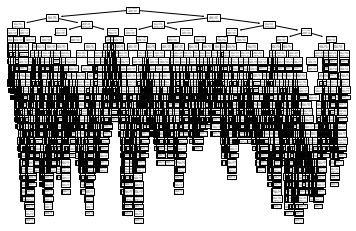

In [ ]:
plot_tree(clf1)

In [ ]:
Y_pred = clf1.predict(X_testc)
print(classification_report(Y_testc, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10940
           1       0.54      0.54      0.54      1417

    accuracy                           0.89     12357
   macro avg       0.74      0.74      0.74     12357
weighted avg       0.89      0.89      0.89     12357



In [ ]:
clf2 = DecisionTreeClassifier(criterion = 'gini') #Gini Index
clf2.fit(X_trainc, Y_trainc)

DecisionTreeClassifier()

[Text(0.4016854267150094, 0.9827586206896551, 'X[9] <= 5087.65\ngini = 0.201\nsamples = 28831\nvalue = [25561, 3270]'),
 Text(0.14510905592840767, 0.9482758620689655, 'X[1] <= 158.5\ngini = 0.495\nsamples = 3449\nvalue = [1892, 1557]'),
 Text(0.04133809838977959, 0.9137931034482759, 'X[1] <= 124.5\ngini = 0.262\nsamples = 1185\nvalue = [1001, 184]'),
 Text(0.01066585966959566, 0.8793103448275862, 'X[3] <= 3.5\ngini = 0.171\nsamples = 794\nvalue = [719, 75]'),
 Text(0.002926090099190971, 0.8448275862068966, 'X[8] <= 0.734\ngini = 0.491\nsamples = 44\nvalue = [25, 19]'),
 Text(0.001114700990167989, 0.8103448275862069, 'X[2] <= 3.5\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.0005573504950839945, 0.7758620689655172, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.0016720514852519835, 0.7758620689655172, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.004737479208213953, 0.8103448275862069, 'X[0] <= 31.5\ngini = 0.431\nsamples = 35\nvalue = [24, 11]'),
 Text(0.002786752475

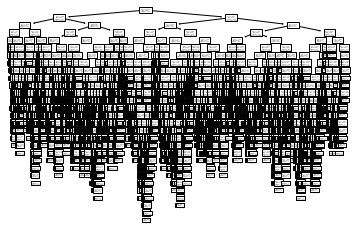

In [ ]:
plot_tree(clf2)

In [ ]:
Y_pred = clf2.predict(X_testc)
print(classification_report(Y_testc, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10940
           1       0.53      0.52      0.52      1417

    accuracy                           0.89     12357
   macro avg       0.73      0.73      0.73     12357
weighted avg       0.89      0.89      0.89     12357



In [ ]:
#Post Pruning
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_trainc, Y_trainc)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

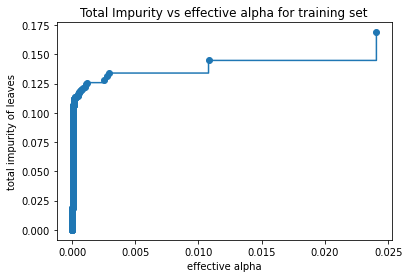

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker = "o", drawstyle = "steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha = ccp_alpha)
    clf.fit(X_trainc, Y_trainc)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.029695839650283717


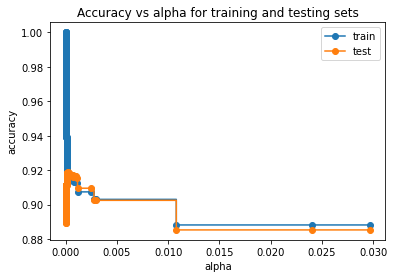

In [ ]:
train_scores = [clf.score(X_trainc, Y_trainc) for clf in clfs]
test_scores = [clf.score(X_testc, Y_testc) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker = "o", label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker = "o", label = "test", drawstyle = "steps-post")
ax.legend()
plt.show()

In [ ]:
clf2_1 = DecisionTreeClassifier(criterion = 'gini', ccp_alpha = 0.0005) #Gini Index
clf2_1.fit(X_trainc, Y_trainc)

DecisionTreeClassifier(ccp_alpha=0.0005)

In [ ]:
Y_pred = clf2_1.predict(X_testc)
print(classification_report(Y_testc, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10940
           1       0.64      0.64      0.64      1417

    accuracy                           0.92     12357
   macro avg       0.80      0.79      0.80     12357
weighted avg       0.92      0.92      0.92     12357



Feature: 0, Score: 0.10252
Feature: 1, Score: 0.35800
Feature: 2, Score: 0.03246
Feature: 3, Score: 0.02232
Feature: 4, Score: 0.00983
Feature: 5, Score: 0.00580
Feature: 6, Score: 0.01509
Feature: 7, Score: 0.03028
Feature: 8, Score: 0.10232
Feature: 9, Score: 0.15367
Feature: 10, Score: 0.00745
Feature: 11, Score: 0.00333
Feature: 12, Score: 0.00260
Feature: 13, Score: 0.00897
Feature: 14, Score: 0.00391
Feature: 15, Score: 0.00623
Feature: 16, Score: 0.00628
Feature: 17, Score: 0.00419
Feature: 18, Score: 0.01349
Feature: 19, Score: 0.00290
Feature: 20, Score: 0.00164
Feature: 21, Score: 0.00760
Feature: 22, Score: 0.01233
Feature: 23, Score: 0.00027
Feature: 24, Score: 0.00577
Feature: 25, Score: 0.00383
Feature: 26, Score: 0.00801
Feature: 27, Score: 0.00954
Feature: 28, Score: 0.00033
Feature: 29, Score: 0.00852
Feature: 30, Score: 0.00642
Feature: 31, Score: 0.00620
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00116
Feature: 34, Score: 0.01763
Feature: 35, Score: 0.00271
Fe

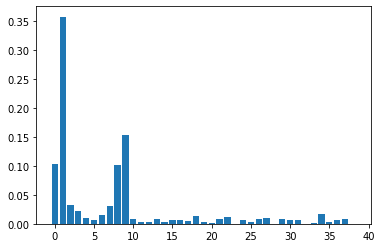

In [ ]:
# get importance
importance = clf2.feature_importances_
# summarize feature importance
for i, v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i, v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

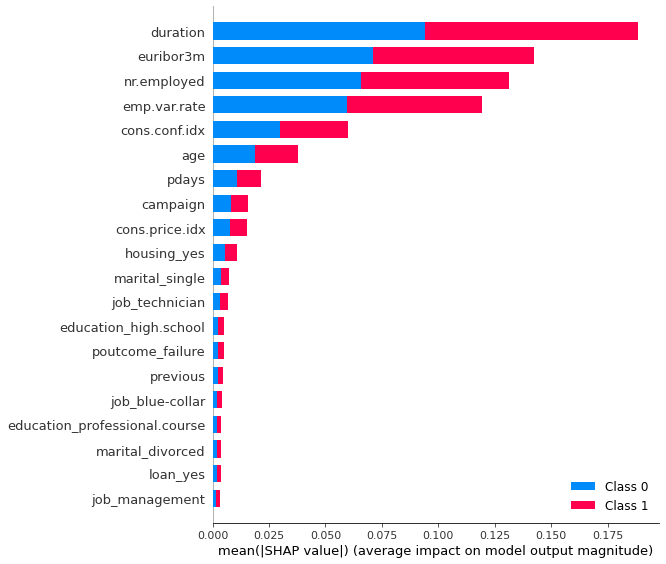

In [ ]:
#SHAP value - Variable Importance
shap_values = shap.TreeExplainer(clf2).shap_values(X_trainc)
shap.summary_plot(shap_values, X_trainc, plot_type = "bar")

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf1 = RandomForestClassifier()
rf1.fit(X_trainc, Y_trainc)

RandomForestClassifier()

In [ ]:
Y_pred = rf1.predict(X_testc)
print(classification_report(Y_testc, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10940
           1       0.67      0.49      0.57      1417

    accuracy                           0.91     12357
   macro avg       0.81      0.73      0.76     12357
weighted avg       0.91      0.91      0.91     12357



In [ ]:
#Cross Validation
rf1a = RandomForestClassifier()
cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
n_scores = cross_val_score(rf1a, X, Y, scoring = 'f1', cv = cv, n_jobs = -1, error_score = 'raise')

In [ ]:
n_scores

array([0.60294118, 0.57462687, 0.53101737, 0.54233129, 0.56869773,
       0.54700855, 0.53015075, 0.56      , 0.59020311, 0.54846336])

In [ ]:
print('F1-score: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

F1-score: 0.560 (0.023)
